<a href="https://colab.research.google.com/github/alaoo/Medical-school-staff-survey/blob/main/staff_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from matplotlib.transforms import Bbox
from  matplotlib.ticker import PercentFormatter

# setting display dimensions
pd.set_option('display.width', 3200)
pd.set_option('display.max_columns', 40)
plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

In [2]:
#Load the data set
from google.colab import files
uploaded = files.upload()

Saving staff survey new.csv to staff survey new.csv


In [3]:
df_staff = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/staff survey new.csv")

In [4]:
# Reading the sata
# df_staff = pd.read_csv("staff survey new.csv")
print(df_staff.tail())

               medical school  4-year course  5- year course  5- year course plus intercalation  5 -year course plus science foundation Clinical Trials learning objectives Statistical testing and plotting data learning objectives Using statistics software e.g. SPSS, STATA, Excel, R, Python etc  learning objectives Basic Computer programming e.g. in R or python  learning objectives Artificial Intelligence / Machine Learning learning objectives Big Data Analytics/ Real World Evidence learning objectives  Data science teaching in year 1  Data science teaching in year 2  Data science teaching in year 3  Data science teaching in year 4  Data science teaching in year 5  Data science teaching in year 6 Is any of the teaching you offer described as data science? Does this teaching go beyond statistics? For example, an introduction to computer coding, or use of AI in medicine? Do you have plans to increase the amount of health data science in the curriculum? Do you specifically test students kn

In [5]:
med_school_count = df_staff['medical school'].value_counts().to_frame("count")
print(med_school_count)

                                       count
Brighton and Sussex Medical School        10
Lancaster Medical School                   6
University of Dundee Medical School        6
University of Manchester                   3
University of St Andrews                   3
Keele University                           3
University of Southampton                  2
Queen's University Belfast                 2
Hull York Medical School                   1
University of Sheffield                    1
University of Oxford                       1
Edinburgh Medical School                   1
University of Liverpool                    1
University of Leeds                        1
University of Exeter                       1
University of Cambridge                    1
Norwich Medical School                     1
University of Buckingham                   1
Cardiff University                         1
University of Aberdeen                     1
Ulster University, School of Medicine      1
St George'

In [6]:
# converting colums to lowercase

df_staff.columns = df_staff.columns.str.lower()
print(df_staff.columns)

Index(['medical school', '4-year course', '5- year course', '5- year course plus intercalation', '5 -year course plus science foundation', 'clinical trials learning objectives', 'statistical testing and plotting data learning objectives', 'using statistics software e.g. spss, stata, excel, r, python etc  learning objectives', 'basic computer programming e.g. in r or python  learning objectives', 'artificial intelligence / machine learning learning objectives', 'big data analytics/ real world evidence learning objectives', 'data science teaching in year 1', 'data science teaching in year 2', 'data science teaching in year 3', 'data science teaching in year 4', 'data science teaching in year 5', 'data science teaching in year 6', 'is any of the teaching you offer described as data science?', 'does this teaching go beyond statistics? for example, an introduction to computer coding, or use of ai in medicine?', 'do you have plans to increase the amount of health data science in the curricul

In [7]:
# converting numerical values to categorical values in years data science is taught
df_staff['data science teaching in year 1'] = df_staff['data science teaching in year 1'].replace(1.0,'Yes')
df_staff['data science teaching in year 2'] = df_staff['data science teaching in year 2'].replace(2.0,'Yes')
df_staff['data science teaching in year 3'] = df_staff['data science teaching in year 3'].replace(3.0,'Yes')
df_staff['data science teaching in year 4'] = df_staff['data science teaching in year 4'].replace(4.0,'Yes')
df_staff['data science teaching in year 5'] = df_staff['data science teaching in year 5'].replace(5.0,'Yes')
df_staff['data science teaching in year 6'] = df_staff['data science teaching in year 6'].replace(6.0,'Yes')

df_staff['medical school'] = df_staff['medical school'].replace('  University of Liverpool','University of Liverpool')

In [8]:
# filling missing values in years data science is taught as 'no'
df_staff['data science teaching in year 1'].fillna('No', inplace=True)
df_staff['data science teaching in year 2'].fillna('No', inplace=True)
df_staff['data science teaching in year 3'].fillna('No', inplace=True)
df_staff['data science teaching in year 4'].fillna('No', inplace=True)
df_staff['data science teaching in year 5'].fillna('No', inplace=True)
df_staff['data science teaching in year 6'].fillna('No', inplace=True)
df_staff['i believe that in the future medical data science will be:'].fillna('No response', inplace = True)

In [9]:
# printing df_staff
df_staff.head()

,medical school,4-year course,5- year course,5- year course plus intercalation,5 -year course plus science foundation,clinical trials learning objectives,statistical testing and plotting data learning objectives,"using statistics software e.g. spss, stata, excel, r, python etc learning objectives",basic computer programming e.g. in r or python learning objectives,artificial intelligence / machine learning learning objectives,big data analytics/ real world evidence learning objectives,data science teaching in year 1,data science teaching in year 2,data science teaching in year 3,data science teaching in year 4,data science teaching in year 5,data science teaching in year 6,is any of the teaching you offer described as data science?,"does this teaching go beyond statistics? for example, an introduction to computer coding, or use of ai in medicine?",do you have plans to increase the amount of health data science in the curriculum?,do you specifically test students knowledge of data science during medical degree assessments?,i believe that in the future medical data science will be:,are there any other comments you would like to make?
0,Brighton and Sussex Medical School,NaN,NaN,5- year course plus intercalation,NaN,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,NaN,Yes,No,Slightly important,NaN
1,Brighton and Sussex Medical School,NaN,5- year course,5- year course plus intercalation,NaN,Yes,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Very important,We find it difficult to squeeze even basic sta...
2,Brighton and Sussex Medical School,NaN,5- year course,NaN,NaN,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,NaN,No,Yes,Very important,Data science is relevant to our most academic ...
3,Brighton and Sussex Medical School,NaN,NaN,5- year course plus intercalation,NaN,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,Very important,NaN
4,Brighton and Sussex Medical School,NaN,5- year course,5- year course plus intercalation,NaN,Yes,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,NaN,No,No,Very important,Medical students are taught to appreciate the ...


Distribution of staff responses from different medical schools

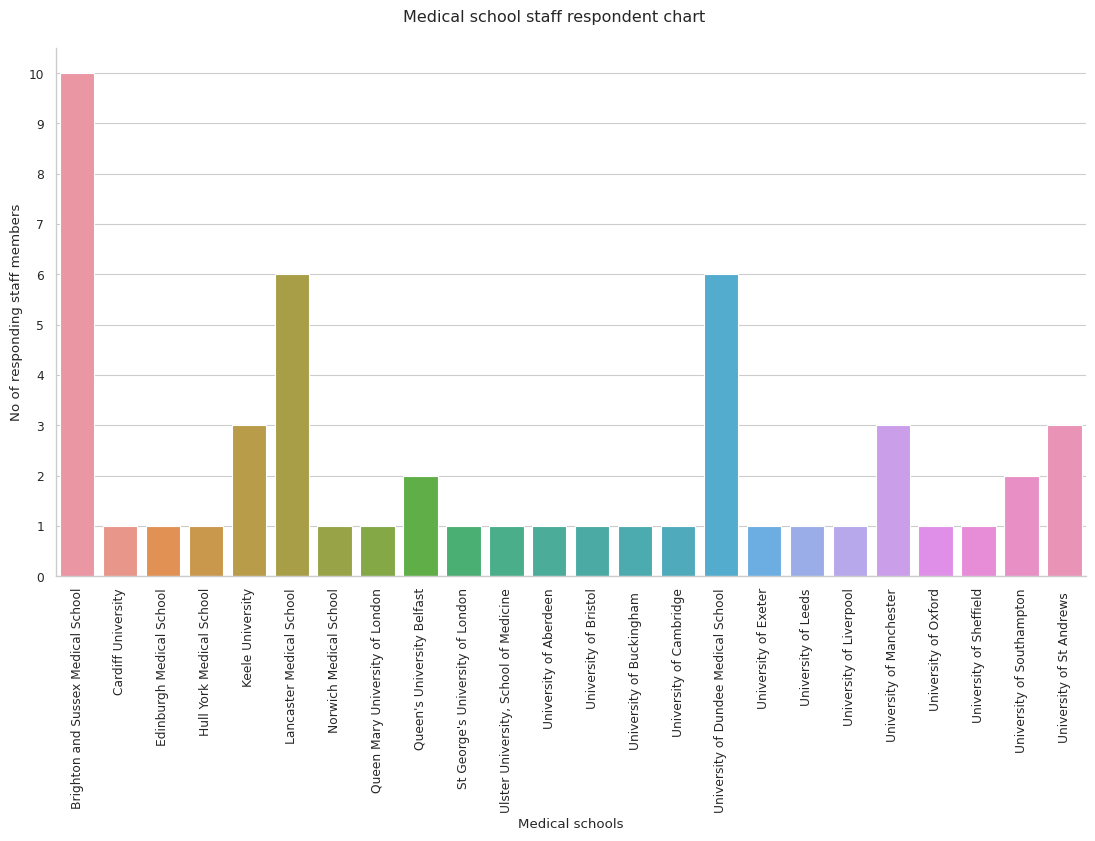

In [10]:
#setting the style for seaborn
sns.set_style('whitegrid')
sns.set_palette('RdBu')
sns.set_context('paper')
g = sns.catplot(x= 'medical school', data = df_staff, height=6, aspect=2, kind= 'count')
g.fig.suptitle("Medical school staff respondent chart", y = 1.04, fontdict={'size': 30, 'weight': 'bold'})
g.set(xlabel ='Medical schools', ylabel = "No of responding staff members")
plt.xticks(rotation = 90)
plt.yticks(range(0,11, 1))



plt.savefig('Medical school staff distribution.png', dpi = 300, bbox_inches='tight')

plt.show()

**Analysis of individual questions**

Takes the input of individual questions and automatically runs the analysis

In [ ]:
#setting the orders
order2 = ["Very important", "Slightly important", "Neither important nor unimportant", "No response"]
order1 = ['Yes', 'No']

is any of the teaching you offer described as data science?
     Response
No         43
Yes         7

Percentage of respondents
No     86.0%
Yes    14.0%
Name: is any of the teaching you offer described as data science?, dtype: object


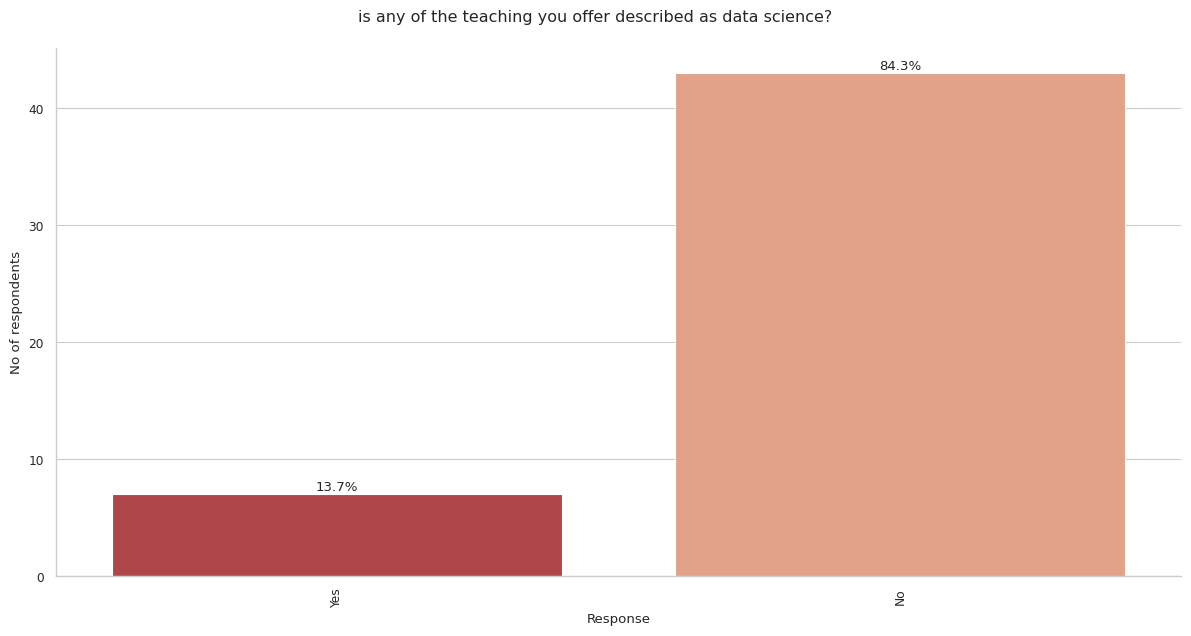

In [13]:
class Question_analysis:
  def __init__(self, dataframe):
    self.dataframe = dataframe


  def input_question(self):
    pass


  def display(self):
    column = input()
    ques_anal_result = self.dataframe[column].value_counts().to_frame('Response')
    print(self.dataframe[column].value_counts().to_frame('Response'))

    #pecentage of repondents
    print()
    print("Percentage of respondents")
    perc = self.dataframe[column].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
    print(self.dataframe[column].value_counts(normalize = True).mul(100).round(1).astype(str) + '%')
    g=sns.catplot(x= column, data=df_staff, height=6, aspect=2, kind='count', order = order2)
    g.fig.suptitle(column, y = 1.04)#, fontsize=20)
    g.set(xlabel = "Response", ylabel = "No of respondents")


    plt.xticks(rotation = 90)


    total = len(df_staff)
    for ax in g.axes.ravel():
      for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.savefig(f'Chart for {column}.png', dpi = 300, bbox_inches='tight')
    #ques_anal_result.plot(kind='bar', figsize=(10,6))
    #plt.title(f"Question analysis result for {column}.")
    #plt.ylabel("Count")
    plt.show()

Question_analysis(df_staff).display()

Printing the columns for easy accessibility to use for individual questions analysis

In [ ]:
print(df_staff.columns)

Index(['medical school', '4-year course', '5- year course', '5- year course plus intercalation', '5 -year course plus science foundation', 'clinical trials learning objectives', 'statistical testing and plotting data learning objectives', 'using statistics software e.g. spss, stata, excel, r, python etc  learning objectives', 'basic computer programming e.g. in r or python  learning objectives', 'artificial intelligence / machine learning learning objectives', 'big data analytics/ real world evidence learning objectives', 'data science teaching in year 1', 'data science teaching in year 2', 'data science teaching in year 3', 'data science teaching in year 4', 'data science teaching in year 5', 'data science teaching in year 6', 'is any of the teaching you offer described as data science?', 'does this teaching go beyond statistics? for example, an introduction to computer coding, or use of ai in medicine?', 'do you have plans to increase the amount of health data science in the curricul

**Analysis for schools with atleast 5 staff respondents**

In [ ]:
med_school_count = df_staff['medical school'].value_counts().to_frame("count")
sch_list = list(med_school_count[med_school_count['count'] >= 5].index)

In [ ]:
triangle_staff = df_staff["medical school"].isin(sch_list)
df_triangle_staff = df_staff[triangle_staff]
print(df_triangle_staff)

                         medical school  4-year course  5- year course  5- year course plus intercalation  5 -year course plus science foundation clinical trials learning objectives statistical testing and plotting data learning objectives using statistics software e.g. spss, stata, excel, r, python etc  learning objectives basic computer programming e.g. in r or python  learning objectives artificial intelligence / machine learning learning objectives big data analytics/ real world evidence learning objectives data science teaching in year 1 data science teaching in year 2 data science teaching in year 3 data science teaching in year 4 data science teaching in year 5 data science teaching in year 6 is any of the teaching you offer described as data science? does this teaching go beyond statistics? for example, an introduction to computer coding, or use of ai in medicine? do you have plans to increase the amount of health data science in the curriculum? do you specifically test student

Analysis for "i believe that in the future medical data science will be:" in selected schools

i believe that in the future medical data science will be:  Neither important nor unimportant  No response  Slightly important  Very important
medical school                                                                                                                                
Brighton and Sussex Medical School                                                          1            0                   2               7
Lancaster Medical School                                                                    0            1                   0               5
University of Dundee Medical School                                                         1            1                   0               4


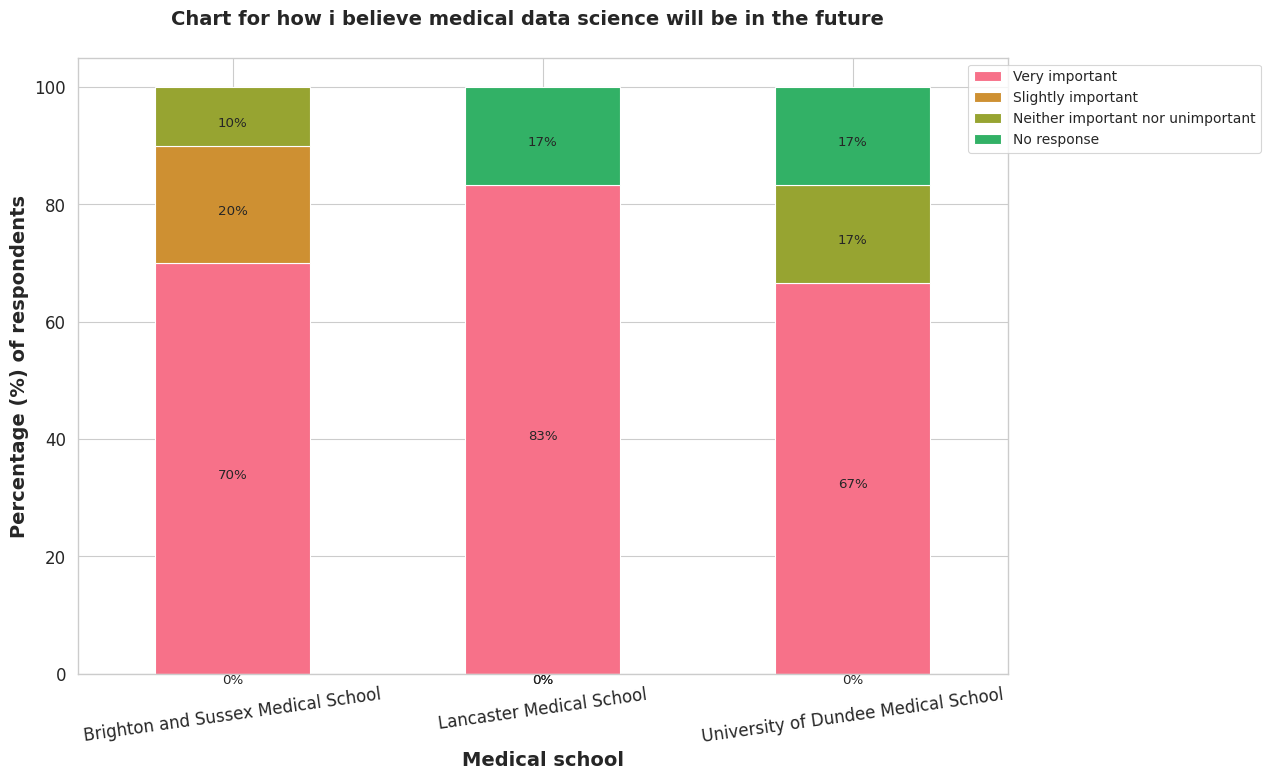

In [ ]:
DS_believe_triangle = pd.crosstab([df_triangle_staff["medical school"]], [df_triangle_staff["i believe that in the future medical data science will be:"]]).apply(lambda r: r/r.sum()*100, axis=1)
DS_believe_triangle_plain = pd.crosstab([df_triangle_staff["medical school"]], [df_triangle_staff["i believe that in the future medical data science will be:"]])
DS_believe_triangle = DS_believe_triangle[order2]
print(DS_believe_triangle_plain)
sns.set_palette("husl", 8)

ax_1 = DS_believe_triangle.plot(kind='bar', figsize=(12,8), fontsize = 12, rot = 8, stacked = True)
# plt.legend(loc=1, prop={'size': 8})
plt.suptitle("Chart for how i believe medical data science will be in the future", fontsize = 14, fontweight = 'bold', y=0.94)
plt.ylabel("Percentage (%) of respondents", fontsize = 14, fontweight = 'bold')
plt.xlabel("Medical school", fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor=(0.95, 1), loc='upper left', prop={'size': 10})


for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2,
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center',
              va='top')
plt.savefig('Chart for how i believe medical data science will be in the future.png', dpi = 300, bbox_inches='tight')

plt.show()



Analysis for "do you specifically test students knowledge of data science during medical degree assessments?" in selected schools

do you specifically test students knowledge of data science during medical degree assessments?  No  Yes
medical school                                                                                         
Brighton and Sussex Medical School                                                               5    5
Lancaster Medical School                                                                         2    4
University of Dundee Medical School                                                              3    2


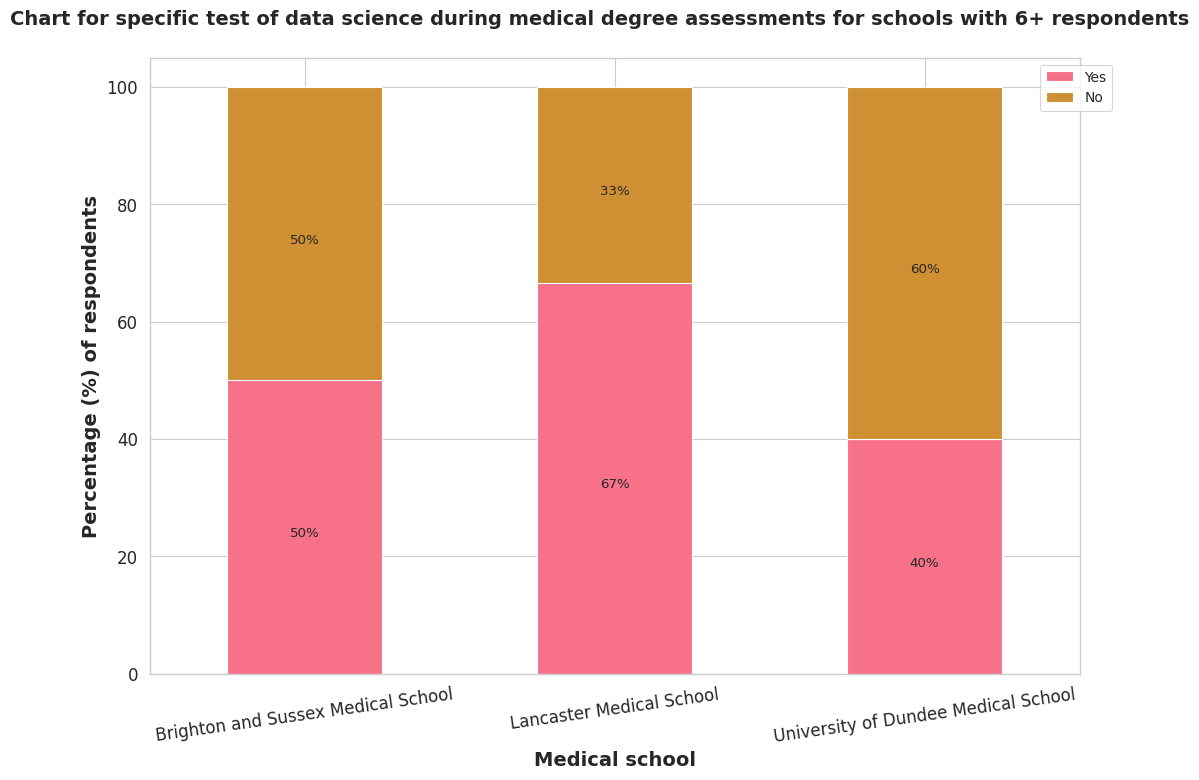

In [ ]:
DS_test_triangle = pd.crosstab([df_triangle_staff["medical school"]], [df_triangle_staff["do you specifically test students knowledge of data science during medical degree assessments?"]]).apply(lambda r: r/r.sum()*100, axis=1)
DS_test_triangle_plain = pd.crosstab([df_triangle_staff["medical school"]], [df_triangle_staff["do you specifically test students knowledge of data science during medical degree assessments?"]])
DS_test_triangle = DS_test_triangle[order1]
print(DS_test_triangle_plain)
sns.set_palette("husl", 8)

ax_2 = DS_test_triangle.plot(kind='bar', figsize=(12,8), fontsize = 12, rot = 8, stacked = True)
# plt.legend(loc=1, prop={'size': 8})
plt.suptitle("Chart for specific test of data science during medical degree assessments for schools with 6+ respondents", fontsize = 14, fontweight = 'bold', y=0.94)
plt.ylabel("Percentage (%) of respondents", fontsize = 14, fontweight = 'bold')
plt.xlabel("Medical school", fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor=(0.95, 1), loc='upper left', prop={'size': 10})


for rec in ax_2.patches:
    height = rec.get_height()
    ax_2.text(rec.get_x() + rec.get_width() / 2,
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center',
              va='top')
plt.savefig('Chart for specific test of data science during medical degree assessments for 6+ schools.png', dpi = 300, bbox_inches='tight')

plt.show()

Analysis for "do you have plans to increase the amount of health data science in the curriculum?" in selected schools

do you have plans to increase the amount of health data science in the curriculum?  No  Yes
medical school                                                                             
Brighton and Sussex Medical School                                                   8    1
Lancaster Medical School                                                             1    5
University of Dundee Medical School                                                  2    2


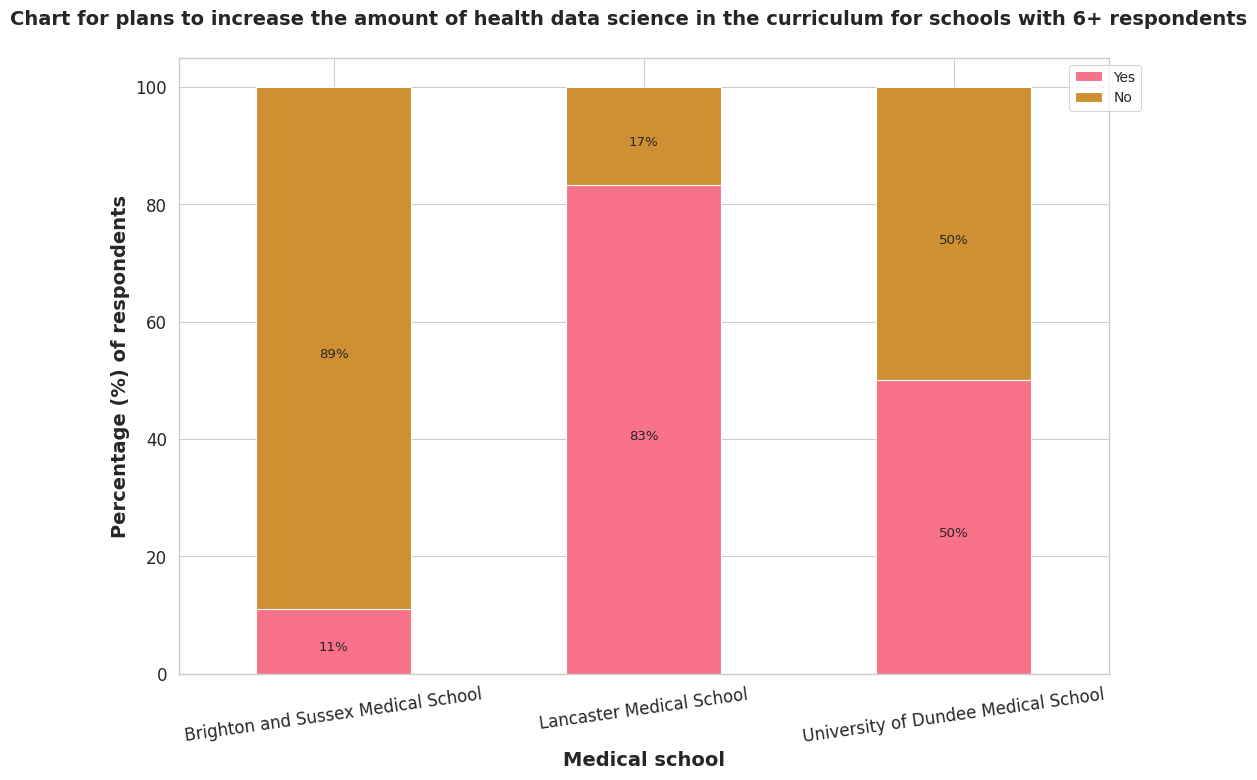

In [ ]:
DS_increase_triangle = pd.crosstab([df_triangle_staff["medical school"]], [df_triangle_staff["do you have plans to increase the amount of health data science in the curriculum?"]]).apply(lambda r: r/r.sum()*100, axis=1)
DS_increase_triangle_plain = pd.crosstab([df_triangle_staff["medical school"]], [df_triangle_staff["do you have plans to increase the amount of health data science in the curriculum?"]])
DS_increase_triangle = DS_increase_triangle[order1]
print(DS_increase_triangle_plain)
sns.set_palette("husl", 8)

ax_3 = DS_increase_triangle.plot(kind='bar', figsize=(12,8), fontsize = 12, rot = 8, stacked = True)
# plt.legend(loc=1, prop={'size': 8})
plt.suptitle("Chart for plans to increase the amount of health data science in the curriculum for schools with 6+ respondents", fontsize = 14, fontweight = 'bold', y=0.94)
plt.ylabel("Percentage (%) of respondents", fontsize = 14, fontweight = 'bold')
plt.xlabel("Medical school", fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor=(0.95, 1), loc='upper left', prop={'size': 10})


for rec in ax_3.patches:
    height = rec.get_height()
    ax_3.text(rec.get_x() + rec.get_width() / 2,
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center',
              va='top')
plt.savefig('Chart for  plans to increase the amount of health data science in the curriculum for 6+ schools.png', dpi = 300, bbox_inches='tight')

plt.show()